<a href="https://colab.research.google.com/github/zyf2021/Cinnamon-Plant-Stem-and-Branch-Disease-Dataset/blob/main/CNN_2_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
!unzip /content/drive/MyDrive/Виноградники/Dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Dataset/train/2/frame_421.jpg  
  inflating: Dataset/train/2/frame_423.jpg  
  inflating: Dataset/train/2/frame_425.jpg  
  inflating: Dataset/train/2/frame_426.jpg  
  inflating: Dataset/train/2/frame_427.jpg  
  inflating: Dataset/train/2/frame_43.jpg  
  inflating: Dataset/train/2/frame_46.jpg  
  inflating: Dataset/train/2/frame_47.jpg  
  inflating: Dataset/train/2/frame_48.jpg  
  inflating: Dataset/train/2/frame_49.jpg  
  inflating: Dataset/train/2/frame_5.jpg  
  inflating: Dataset/train/2/frame_50.jpg  
  inflating: Dataset/train/2/frame_51.jpg  
  inflating: Dataset/train/2/frame_52.jpg  
  inflating: Dataset/train/2/frame_53.jpg  
  inflating: Dataset/train/2/frame_54.jpg  
  inflating: Dataset/train/2/frame_55.jpg  
  inflating: Dataset/train/2/frame_57.jpg  
  inflating: Dataset/train/2/frame_59.jpg  
  inflating: Dataset/train/2/frame_59138.jpg  
  inflating: Dataset/train/2/frame_59139.jpg 

In [ ]:
!pip install torch torchvision torchaudio numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [4]:
from PIL import Image

In [5]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [6]:
#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6
  
#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((128,128)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), 
                                     std = (0.5, 0.5, 0.5))])
  
#Загрузка датасета из 2 классов

train_dataset = torchvision.datasets.ImageFolder(root = '/content/Dataset/train',
                                                transform = normalize_transform,
                                                is_valid_file = check_image)
    
test_dataset = torchvision.datasets.ImageFolder(root = '/content/Dataset/test',
                                                transform = normalize_transform,
                                                is_valid_file = check_image)
    
#Generating data loaders from the corresponding datasets
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)


    


In [15]:
#Plotting 25 images from the 1st batch 
images, labels = next(iter(train_loader))
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[100:125], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

RuntimeError: ignored

In [7]:
images, labels = next(iter(train_loader))
images.shape

torch.Size([64, 3, 128, 128])

Text(0, 0.5, 'Number of training instances')

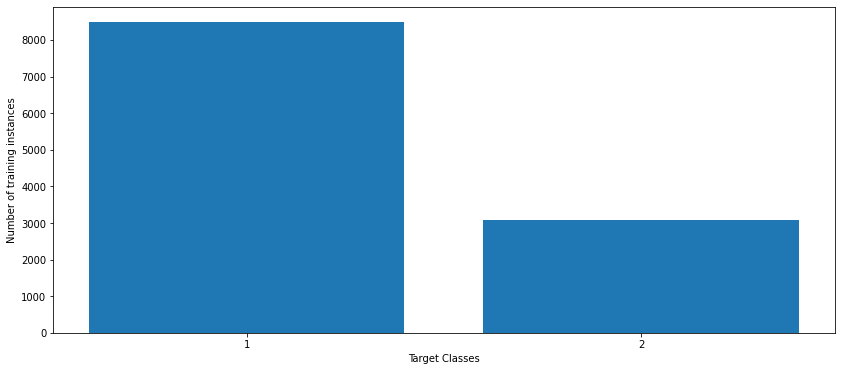

In [8]:
#Iterating over the training dataset and storing the target class for each sample
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data 
    classes.extend(y.tolist())
      
#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

In [9]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(3, 6, 5)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        self.fc1 = torch.nn.Linear(13456, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 2)
  
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")
    
model = CNN().to(device)
  
#Defining the model hyper parameters
num_epochs = 20
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
train_loss_list = []

In [11]:
for epoch in range(num_epochs):
    train_loss = 0
    model.train()
    for batch in train_loader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.data.item() * images.size(0)
        
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")
        

Training loss = 4.823358654379449
Training loss = 14.278414252931432
Training loss = 63.0668590381743
Training loss = 18.840832506965608
Training loss = 26.452864601376547
Training loss = 49.64142615249308
Training loss = 32.72127619365138
Training loss = 19.363461019894398
Training loss = 22.899158345840927
Training loss = 23.47756549033496
Training loss = 33.926341619227856
Training loss = 33.16919110633062
Training loss = 19.157282736232542
Training loss = 31.884772914367243
Training loss = 37.04980011704218
Training loss = 38.14163425614162
Training loss = 41.88882270801133
Training loss = 37.853061798198446
Training loss = 33.89583809731415
Training loss = 32.315886227300815


Text(0, 0.5, 'Training loss')

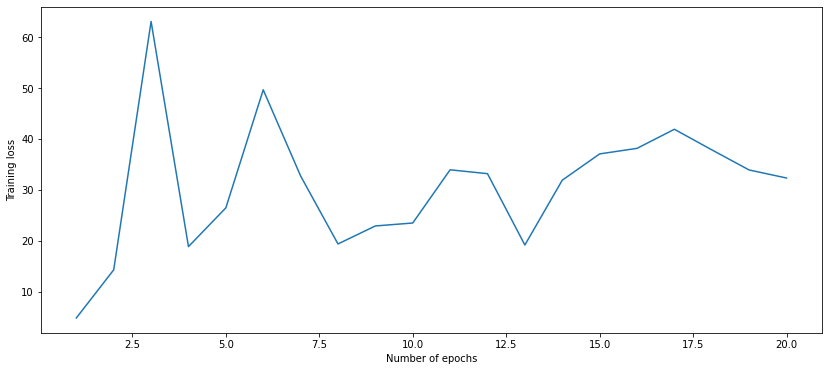

In [12]:
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

In [14]:
test_acc=0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):
          
        images = images.to(device)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
          
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 73.27690447400242 %
